# Double asperity simulations

In the previous tutorial, we looked at a rather simple configuration, that of a single asperity which exhibited repetitive, stable limit cycles. In this tutorial, we'll consider a fault with two asperities, one of size $f L_a$, and another of size $(1-f)L_a$. We begin with $f = 0.5$, meaning that both asperities are of equal size $0.5 L_a$. Later on, we can tune this parameter $f$ to see how the behaviour changes.

In [1]:
# Make plots interactive in the notebook
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

# Import QDYN wrapper and plotting library
from qdyn import qdyn
from qdyn import plot_functions as qdyn_plot

We prepare the simulation in a similar way as we have done in the single asperity case:

In [3]:
# Instantiate the QDYN class object
p = qdyn()

# Predefine parameters
t_yr = 3600 * 24 * 365.0    # seconds per year
f = 0.5                     # Size ratio of asperities
L = 15                      # Length of fault / nucleation length
ab_ratio = 0.8              # a/b of asperity
cab_ratio = 1 - ab_ratio
resolution = 7              # Mesh resolution / process zone width

# Get the settings dict
set_dict = p.set_dict

""" Step 1: Define simulation/mesh parameters """
# Global simulation parameters
set_dict["MESHDIM"] = 1        # Simulation dimensionality (1D fault in 2D medium)
set_dict["FINITE"] = 1         # Finite fault
set_dict["TMAX"] = 25*t_yr     # Maximum simulation time [s]
set_dict["NTOUT_OX"] = 100        # Save output every N steps
set_dict["NXOUT_OX"] = 2          # Snapshot resolution (every N elements)
set_dict["V_PL"] = 1e-9        # Plate velocity
set_dict["MU"] = 3e10          # Shear modulus
set_dict["SIGMA"] = 1e8        # Effective normal stress [Pa]
set_dict["ACC"] = 1e-7         # Solver accuracy
set_dict["SOLVER"] = 2         # Solver type (Runge-Kutta)

# Setting some (default) RSF parameter values
set_dict["SET_DICT_RSF"]["A"] = 1.2e-2    # Direct effect
set_dict["SET_DICT_RSF"]["B"] = 1e-2      # Evolution effect
set_dict["SET_DICT_RSF"]["DC"] = 4e-4     # Characteristic slip distance
set_dict["SET_DICT_RSF"]["V_SS"] = set_dict["V_PL"]    # Reference velocity [m/s]
set_dict["SET_DICT_RSF"]["TH_0"] = set_dict["SET_DICT_RSF"]["DC"] / set_dict["V_PL"]    # Initial state [s]

# Compute relevant length scales:
# Process zone width [m]
Lb = set_dict["MU"] * set_dict["SET_DICT_RSF"]["DC"] / (set_dict["SET_DICT_RSF"]["B"] * set_dict["SIGMA"])
# Nucleation length [m]
Lc = Lb / cab_ratio
# Fault length [m]
L *= Lc
L1 = 0.5 * f * L
L2 = 0.5 * (1 - f) * L
p1 = L / 3 - L / 2
p2 = 2 * L / 3 - L / 2

# Find next power of two for number of mesh elements
N = int(np.power(2, np.ceil(np.log2(resolution * L / Lb))))
# Spatial coordinate for mesh
x = np.linspace(-L/2, L/2, N, dtype=float)
asp1 = (x > (p1 - L1 / 2)) & (x < (p1 + L1 / 2))
asp2 = (x > (p2 - L2 / 2)) & (x < (p2 + L2 / 2))

# Set mesh size and fault length
set_dict["N"] = N
set_dict["L"] = L

""" Step 2: Set (default) parameter values and generate mesh """
p.settings(set_dict)
p.render_mesh()

""" Step 3: override default mesh values """
# Distribute direct effect a over mesh according to some arbitrary function
p.mesh_dict["A"][asp1 + asp2] = ab_ratio * p.mesh_dict["B"][asp1 + asp2]

p.set_dict["VERBOSE"] = 1

# Write input to qdyn.in
p.write_input()

Stress field not set, converting V0 into tau...


True

We can visualise the two asperities by plotting $(a-b)$ versus position on the fault:

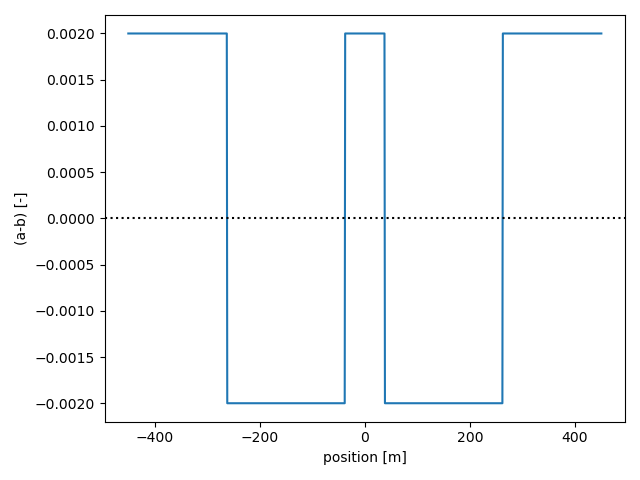

In [4]:
plt.clf()
plt.plot(x, p.mesh_dict["A"] - p.mesh_dict["B"])
plt.axhline(0, ls=":", c="k")
plt.xlabel("position [m]")
plt.ylabel("(a-b) [-]")
plt.tight_layout()
plt.show()

We then run this simulation with `p.run()`

In [5]:
p.run()

 Start reading input...
    Mesh input complete
   Flags input complete
 Input complete
 Initializing mesh...
 1D fault, uniform grid
 Impedance =       0.500E+07                                                                                                                                                                                                                                    
 Intializing kernel: ...
 FFT applied
  Reading kernel/home/vanden/qdyn/qdyn/kernel_I.tab                                                                                                                                                                                                             
 Kernel intialized
 Initialising RK45 solver
 Finished initialising RK45 solver
 Initialization completed
 Values at selected point of the fault:
  K/Kc =  -0.20943951023931953                                                                                                                                          

    2700    0.480E-03   0.103E-05   0.952E+00   0.100E+03                                                                                                                                                                                                       
    2800    0.442E-03   0.103E-05   0.725E+00   0.100E+03                                                                                                                                                                                                       
    2900    0.482E-03   0.103E-05   0.524E+00   0.100E+03                                                                                                                                                                                                       
    3000    0.534E-03   0.103E-05   0.359E+00   0.100E+03                                                                                                                                                                            

    5900    0.830E-02   0.199E+01   0.385E-02   0.100E+03                                                                                                                                                                                                       
    6000    0.500E-02   0.199E+01   0.676E-02   0.100E+03                                                                                                                                                                                                       
    6100    0.399E-02   0.199E+01   0.903E-02   0.100E+03                                                                                                                                                                                                       
    6200    0.315E-02   0.199E+01   0.113E-01   0.100E+03                                                                                                                                                                            

    9100    0.606E-03   0.199E+01   0.154E+00   0.100E+03                                                                                                                                                                                                       
    9200    0.838E-03   0.199E+01   0.101E+00   0.100E+03                                                                                                                                                                                                       
    9300    0.130E-02   0.199E+01   0.633E-01   0.100E+03                                                                                                                                                                                                       
    9400    0.126E-02   0.199E+01   0.330E-01   0.100E+03                                                                                                                                                                            

   12300    0.734E+05   0.338E+01   0.979E-09   0.100E+03                                                                                                                                                                                                       
   12400    0.392E+05   0.355E+01   0.984E-09   0.100E+03                                                                                                                                                                                                       
   12500    0.331E+05   0.366E+01   0.106E-08   0.100E+03                                                                                                                                                                                                       
   12600    0.265E+05   0.376E+01   0.133E-08   0.100E+03                                                                                                                                                                            

   15500    0.207E-03   0.384E+01   0.262E+00   0.100E+03                                                                                                                                                                                                       
   15600    0.199E-03   0.384E+01   0.279E+00   0.100E+03                                                                                                                                                                                                       
   15700    0.190E-03   0.384E+01   0.296E+00   0.100E+03                                                                                                                                                                                                       
   15800    0.183E-03   0.384E+01   0.313E+00   0.100E+03                                                                                                                                                                            

   18700    0.114E+02   0.384E+01   0.333E-05   0.100E+03                                                                                                                                                                                                       
   18800    0.171E+02   0.384E+01   0.222E-05   0.100E+03                                                                                                                                                                                                       
   18900    0.257E+02   0.384E+01   0.152E-05   0.100E+03                                                                                                                                                                                                       
   19000    0.367E+02   0.384E+01   0.106E-05   0.100E+03                                                                                                                                                                            

   21900    0.346E-01   0.568E+01   0.876E-03   0.100E+03                                                                                                                                                                                                       
   22000    0.289E-01   0.568E+01   0.105E-02   0.100E+03                                                                                                                                                                                                       
   22100    0.247E-01   0.568E+01   0.125E-02   0.100E+03                                                                                                                                                                                                       
   22200    0.216E-01   0.568E+01   0.151E-02   0.100E+03                                                                                                                                                                            

   25100    0.234E-03   0.568E+01   0.238E+00   0.100E+03                                                                                                                                                                                                       
   25200    0.214E-03   0.568E+01   0.250E+00   0.100E+03                                                                                                                                                                                                       
   25300    0.209E-03   0.568E+01   0.263E+00   0.100E+03                                                                                                                                                                                                       
   25400    0.200E-03   0.568E+01   0.277E+00   0.100E+03                                                                                                                                                                            

   28300    0.241E+00   0.568E+01   0.142E-03   0.100E+03                                                                                                                                                                                                       
   28400    0.457E+00   0.568E+01   0.755E-04   0.100E+03                                                                                                                                                                                                       
   28500    0.832E+00   0.568E+01   0.419E-04   0.100E+03                                                                                                                                                                                                       
   28600    0.147E+01   0.568E+01   0.241E-04   0.100E+03                                                                                                                                                                            

   31500    0.148E+01   0.751E+01   0.219E-04   0.100E+03                                                                                                                                                                                                       
   31600    0.117E+01   0.751E+01   0.271E-04   0.100E+03                                                                                                                                                                                                       
   31700    0.845E+00   0.751E+01   0.375E-04   0.100E+03                                                                                                                                                                                                       
   31800    0.583E+00   0.751E+01   0.545E-04   0.100E+03                                                                                                                                                                            

   34700    0.282E-02   0.751E+01   0.137E-01   0.100E+03                                                                                                                                                                                                       
   34800    0.133E-01   0.751E+01   0.271E-02   0.100E+03                                                                                                                                                                                                       
   34900    0.478E-01   0.751E+01   0.679E-03   0.100E+03                                                                                                                                                                                                       
   35000    0.165E+00   0.751E+01   0.205E-03   0.100E+03                                                                                                                                                                            

   37900    0.197E-03   0.751E+01   0.289E+00   0.100E+03                                                                                                                                                                                                       
   38000    0.192E-03   0.751E+01   0.293E+00   0.100E+03                                                                                                                                                                                                       
   38100    0.188E-03   0.751E+01   0.299E+00   0.100E+03                                                                                                                                                                                                       
   38200    0.183E-03   0.751E+01   0.308E+00   0.100E+03                                                                                                                                                                            

   41100    0.281E-02   0.751E+01   0.136E-01   0.100E+03                                                                                                                                                                                                       
   41200    0.305E-02   0.751E+01   0.123E-01   0.100E+03                                                                                                                                                                                                       
   41300    0.373E-02   0.751E+01   0.949E-02   0.100E+03                                                                                                                                                                                                       
   41400    0.523E-02   0.751E+01   0.647E-02   0.100E+03                                                                                                                                                                            

   44300    0.280E+05   0.856E+01   0.131E-08   0.100E+03                                                                                                                                                                                                       
   44400    0.296E+05   0.865E+01   0.124E-08   0.100E+03                                                                                                                                                                                                       
   44500    0.220E+05   0.874E+01   0.172E-08   0.100E+03                                                                                                                                                                                                       
   44600    0.843E+04   0.879E+01   0.465E-08   0.100E+03                                                                                                                                                                            

   47500    0.101E+04   0.884E+01   0.314E-07   0.100E+03                                                                                                                                                                                                       
   47600    0.134E+04   0.884E+01   0.238E-07   0.100E+03                                                                                                                                                                                                       
   47700    0.171E+04   0.885E+01   0.188E-07   0.100E+03                                                                                                                                                                                                       
   47800    0.196E+04   0.885E+01   0.167E-07   0.100E+03                                                                                                                                                                            

   50700    0.472E-01   0.886E+01   0.733E-03   0.100E+03                                                                                                                                                                                                       
   50800    0.163E+00   0.886E+01   0.204E-03   0.100E+03                                                                                                                                                                                                       
   50900    0.499E+00   0.886E+01   0.674E-04   0.100E+03                                                                                                                                                                                                       
   51000    0.135E+01   0.886E+01   0.254E-04   0.100E+03                                                                                                                                                                            

   53900    0.272E+02   0.887E+01   0.126E-05   0.100E+03                                                                                                                                                                                                       
   54000    0.923E+02   0.887E+01   0.451E-06   0.100E+03                                                                                                                                                                                                       
   54100    0.117E+03   0.887E+01   0.333E-06   0.100E+03                                                                                                                                                                                                       
   54200    0.283E+03   0.887E+01   0.140E-06   0.100E+03                                                                                                                                                                            

   57100    0.575E+04   0.986E+01   0.776E-08   0.100E+03                                                                                                                                                                                                       
   57200    0.368E+04   0.989E+01   0.745E-08   0.100E+03                                                                                                                                                                                                       
   57300    0.108E+04   0.989E+01   0.339E-07   0.100E+03                                                                                                                                                                                                       
   57400    0.776E+03   0.990E+01   0.435E-07   0.100E+03                                                                                                                                                                            

   60300    0.290E+03   0.100E+02   0.149E-06   0.100E+03                                                                                                                                                                                                       
   60400    0.769E+03   0.100E+02   0.624E-07   0.100E+03                                                                                                                                                                                                       
   60500    0.227E+04   0.100E+02   0.253E-07   0.100E+03                                                                                                                                                                                                       
   60600    0.439E+03   0.100E+02   0.974E-07   0.100E+03                                                                                                                                                                            

   63500    0.856E+02   0.108E+02   0.447E-06   0.100E+03                                                                                                                                                                                                       
   63600    0.720E+02   0.108E+02   0.511E-06   0.100E+03                                                                                                                                                                                                       
   63700    0.643E+02   0.108E+02   0.562E-06   0.100E+03                                                                                                                                                                                                       
   63800    0.602E+02   0.108E+02   0.599E-06   0.100E+03                                                                                                                                                                            

   66700    0.213E-02   0.109E+02   0.179E-01   0.100E+03                                                                                                                                                                                                       
   66800    0.117E-02   0.109E+02   0.347E-01   0.100E+03                                                                                                                                                                                                       
   66900    0.721E-03   0.109E+02   0.617E-01   0.100E+03                                                                                                                                                                                                       
   67000    0.501E-03   0.109E+02   0.936E-01   0.100E+03                                                                                                                                                                            

   69900    0.491E+01   0.109E+02   0.636E-05   0.100E+03                                                                                                                                                                                                       
   70000    0.540E+01   0.109E+02   0.578E-05   0.100E+03                                                                                                                                                                                                       
   70100    0.606E+01   0.109E+02   0.517E-05   0.100E+03                                                                                                                                                                                                       
   70200    0.698E+01   0.109E+02   0.456E-05   0.100E+03                                                                                                                                                                            

   73100    0.210E+05   0.117E+02   0.183E-08   0.100E+03                                                                                                                                                                                                       
   73200    0.205E+05   0.118E+02   0.180E-08   0.100E+03                                                                                                                                                                                                       
   73300    0.202E+05   0.119E+02   0.183E-08   0.100E+03                                                                                                                                                                                                       
   73400    0.174E+05   0.119E+02   0.215E-08   0.100E+03                                                                                                                                                                            

   76300    0.335E+03   0.121E+02   0.101E-06   0.100E+03                                                                                                                                                                                                       
   76400    0.278E+03   0.121E+02   0.120E-06   0.100E+03                                                                                                                                                                                                       
   76500    0.245E+03   0.121E+02   0.133E-06   0.100E+03                                                                                                                                                                                                       
   76600    0.232E+03   0.121E+02   0.141E-06   0.100E+03                                                                                                                                                                            

   79500    0.398E-03   0.121E+02   0.122E+00   0.100E+03                                                                                                                                                                                                       
   79600    0.371E-03   0.121E+02   0.124E+00   0.100E+03                                                                                                                                                                                                       
   79700    0.385E-03   0.121E+02   0.123E+00   0.100E+03                                                                                                                                                                                                       
   79800    0.395E-03   0.121E+02   0.120E+00   0.100E+03                                                                                                                                                                            

   82700    0.495E+02   0.121E+02   0.642E-06   0.100E+03                                                                                                                                                                                                       
   82800    0.773E+02   0.121E+02   0.418E-06   0.100E+03                                                                                                                                                                                                       
   82900    0.123E+03   0.121E+02   0.263E-06   0.100E+03                                                                                                                                                                                                       
   83000    0.206E+03   0.121E+02   0.159E-06   0.100E+03                                                                                                                                                                            

   85900    0.160E+02   0.130E+02   0.214E-05   0.100E+03                                                                                                                                                                                                       
   86000    0.140E+02   0.130E+02   0.245E-05   0.100E+03                                                                                                                                                                                                       
   86100    0.122E+02   0.130E+02   0.278E-05   0.100E+03                                                                                                                                                                                                       
   86200    0.109E+02   0.130E+02   0.305E-05   0.100E+03                                                                                                                                                                            

   89100    0.441E+01   0.132E+02   0.742E-05   0.100E+03                                                                                                                                                                                                       
   89200    0.175E+01   0.132E+02   0.150E-04   0.100E+03                                                                                                                                                                                                       
   89300    0.191E+01   0.132E+02   0.245E-04   0.100E+03                                                                                                                                                                                                       
   89400    0.227E+01   0.132E+02   0.181E-04   0.100E+03                                                                                                                                                                            

   92300    0.407E+03   0.140E+02   0.877E-07   0.100E+03                                                                                                                                                                                                       
   92400    0.238E+03   0.140E+02   0.146E-06   0.100E+03                                                                                                                                                                                                       
   92500    0.163E+03   0.140E+02   0.205E-06   0.100E+03                                                                                                                                                                                                       
   92600    0.345E+03   0.140E+02   0.128E-06   0.100E+03                                                                                                                                                                            

   95500    0.372E-01   0.141E+02   0.829E-03   0.100E+03                                                                                                                                                                                                       
   95600    0.248E-01   0.141E+02   0.123E-02   0.100E+03                                                                                                                                                                                                       
   95700    0.164E-01   0.141E+02   0.191E-02   0.100E+03                                                                                                                                                                                                       
   95800    0.102E-01   0.141E+02   0.312E-02   0.100E+03                                                                                                                                                                            

   98700    0.457E+01   0.141E+02   0.719E-05   0.100E+03                                                                                                                                                                                                       
   98800    0.396E+01   0.141E+02   0.811E-05   0.100E+03                                                                                                                                                                                                       
   98900    0.382E+01   0.141E+02   0.835E-05   0.100E+03                                                                                                                                                                                                       
   99000    0.381E+01   0.141E+02   0.826E-05   0.100E+03                                                                                                                                                                            

  101900    0.211E+05   0.141E+02   0.311E-08   0.100E+03                                                                                                                                                                                                       
  102000    0.106E+06   0.144E+02   0.968E-09   0.100E+03                                                                                                                                                                                                       
  102100    0.988E+05   0.147E+02   0.973E-09   0.100E+03                                                                                                                                                                                                       
  102200    0.252E+05   0.149E+02   0.171E-08   0.100E+03                                                                                                                                                                            

  105100    0.158E+04   0.152E+02   0.184E-07   0.100E+03                                                                                                                                                                                                       
  105200    0.573E+03   0.152E+02   0.611E-07   0.100E+03                                                                                                                                                                                                       
  105300    0.429E+03   0.152E+02   0.775E-07   0.100E+03                                                                                                                                                                                                       
  105400    0.392E+03   0.152E+02   0.848E-07   0.100E+03                                                                                                                                                                            

  108300    0.435E-03   0.153E+02   0.102E+00   0.100E+03                                                                                                                                                                                                       
  108400    0.385E-03   0.153E+02   0.116E+00   0.100E+03                                                                                                                                                                                                       
  108500    0.376E-03   0.153E+02   0.121E+00   0.100E+03                                                                                                                                                                                                       
  108600    0.394E-03   0.153E+02   0.122E+00   0.100E+03                                                                                                                                                                            

  111500    0.114E+03   0.153E+02   0.287E-06   0.100E+03                                                                                                                                                                                                       
  111600    0.175E+03   0.153E+02   0.185E-06   0.100E+03                                                                                                                                                                                                       
  111700    0.283E+03   0.153E+02   0.116E-06   0.100E+03                                                                                                                                                                                                       
  111800    0.473E+03   0.153E+02   0.711E-07   0.100E+03                                                                                                                                                                            

  114700    0.246E+02   0.162E+02   0.140E-05   0.100E+03                                                                                                                                                                                                       
  114800    0.218E+02   0.162E+02   0.155E-05   0.100E+03                                                                                                                                                                                                       
  114900    0.217E+02   0.162E+02   0.153E-05   0.100E+03                                                                                                                                                                                                       
  115000    0.110E+03   0.162E+02   0.294E-06   0.100E+03                                                                                                                                                                            

  117900    0.603E+01   0.164E+02   0.697E-05   0.100E+03                                                                                                                                                                                                       
  118000    0.295E+02   0.164E+02   0.121E-05   0.100E+03                                                                                                                                                                                                       
  118100    0.118E+03   0.164E+02   0.330E-06   0.100E+03                                                                                                                                                                                                       
  118200    0.360E+03   0.164E+02   0.119E-06   0.100E+03                                                                                                                                                                            

  121100    0.373E+03   0.172E+02   0.956E-07   0.100E+03                                                                                                                                                                                                       
  121200    0.204E+03   0.173E+02   0.170E-06   0.100E+03                                                                                                                                                                                                       
  121300    0.128E+03   0.173E+02   0.264E-06   0.100E+03                                                                                                                                                                                                       
  121400    0.114E+03   0.173E+02   0.267E-06   0.100E+03                                                                                                                                                                            

  124300    0.141E-01   0.173E+02   0.213E-02   0.100E+03                                                                                                                                                                                                       
  124400    0.134E-01   0.173E+02   0.239E-02   0.100E+03                                                                                                                                                                                                       
  124500    0.112E-01   0.173E+02   0.275E-02   0.100E+03                                                                                                                                                                                                       
  124600    0.917E-02   0.173E+02   0.340E-02   0.100E+03                                                                                                                                                                            

  127500    0.433E+01   0.173E+02   0.814E-05   0.100E+03                                                                                                                                                                                                       
  127600    0.266E+01   0.173E+02   0.122E-04   0.100E+03                                                                                                                                                                                                       
  127700    0.232E+01   0.173E+02   0.140E-04   0.100E+03                                                                                                                                                                                                       
  127800    0.220E+01   0.173E+02   0.146E-04   0.100E+03                                                                                                                                                                            

  130700    0.180E+04   0.173E+02   0.310E-07   0.100E+03                                                                                                                                                                                                       
  130800    0.468E+05   0.173E+02   0.130E-08   0.100E+03                                                                                                                                                                                                       
  130900    0.102E+06   0.177E+02   0.969E-09   0.100E+03                                                                                                                                                                                                       
  131000    0.982E+05   0.180E+02   0.975E-09   0.100E+03                                                                                                                                                                            

  133900    0.188E+04   0.184E+02   0.153E-07   0.100E+03                                                                                                                                                                                                       
  134000    0.694E+03   0.184E+02   0.506E-07   0.100E+03                                                                                                                                                                                                       
  134100    0.536E+03   0.184E+02   0.626E-07   0.100E+03                                                                                                                                                                                                       
  134200    0.498E+03   0.184E+02   0.657E-07   0.100E+03                                                                                                                                                                            

  137100    0.488E-03   0.184E+02   0.906E-01   0.100E+03                                                                                                                                                                                                       
  137200    0.435E-03   0.184E+02   0.104E+00   0.100E+03                                                                                                                                                                                                       
  137300    0.409E-03   0.184E+02   0.116E+00   0.100E+03                                                                                                                                                                                                       
  137400    0.376E-03   0.184E+02   0.127E+00   0.100E+03                                                                                                                                                                            

  140300    0.771E+03   0.184E+02   0.445E-07   0.100E+03                                                                                                                                                                                                       
  140400    0.120E+04   0.184E+02   0.292E-07   0.100E+03                                                                                                                                                                                                       
  140500    0.147E+04   0.184E+02   0.253E-07   0.100E+03                                                                                                                                                                                                       
  140600    0.678E+03   0.185E+02   0.607E-07   0.100E+03                                                                                                                                                                            

  143500    0.501E+03   0.194E+02   0.827E-07   0.100E+03                                                                                                                                                                                                       
  143600    0.134E+04   0.194E+02   0.293E-07   0.100E+03                                                                                                                                                                                                       
  143700    0.364E+04   0.194E+02   0.117E-07   0.100E+03                                                                                                                                                                                                       
  143800    0.935E+04   0.194E+02   0.509E-08   0.100E+03                                                                                                                                                                            

  146700    0.330E+04   0.196E+02   0.106E-07   0.100E+03                                                                                                                                                                                                       
  146800    0.965E+03   0.196E+02   0.431E-07   0.100E+03                                                                                                                                                                                                       
  146900    0.673E+03   0.196E+02   0.521E-07   0.100E+03                                                                                                                                                                                                       
  147000    0.896E+03   0.196E+02   0.375E-07   0.100E+03                                                                                                                                                                            

  149900    0.135E+03   0.205E+02   0.256E-06   0.100E+03                                                                                                                                                                                                       
  150000    0.838E+02   0.205E+02   0.404E-06   0.100E+03                                                                                                                                                                                                       
  150100    0.584E+02   0.205E+02   0.554E-06   0.100E+03                                                                                                                                                                                                       
  150200    0.435E+02   0.205E+02   0.946E-06   0.100E+03                                                                                                                                                                            

  153100    0.446E-03   0.205E+02   0.101E+00   0.100E+03                                                                                                                                                                                                       
  153200    0.294E-03   0.205E+02   0.184E+00   0.100E+03                                                                                                                                                                                                       
  153300    0.223E-03   0.205E+02   0.262E+00   0.100E+03                                                                                                                                                                                                       
  153400    0.185E-03   0.205E+02   0.325E+00   0.100E+03                                                                                                                                                                            

  156300    0.107E+01   0.205E+02   0.301E-04   0.100E+03                                                                                                                                                                                                       
  156400    0.946E+00   0.205E+02   0.332E-04   0.100E+03                                                                                                                                                                                                       
  156500    0.939E+00   0.205E+02   0.332E-04   0.100E+03                                                                                                                                                                                                       
  156600    0.101E+01   0.205E+02   0.313E-04   0.100E+03                                                                                                                                                                            

  159500    0.503E+05   0.213E+02   0.114E-08   0.100E+03                                                                                                                                                                                                       
  159600    0.173E+05   0.213E+02   0.225E-08   0.100E+03                                                                                                                                                                                                       
  159700    0.149E+05   0.214E+02   0.253E-08   0.100E+03                                                                                                                                                                                                       
  159800    0.130E+05   0.214E+02   0.284E-08   0.100E+03                                                                                                                                                                            

  162700    0.712E+03   0.216E+02   0.455E-07   0.100E+03                                                                                                                                                                                                       
  162800    0.826E+03   0.216E+02   0.399E-07   0.100E+03                                                                                                                                                                                                       
  162900    0.998E+03   0.216E+02   0.321E-07   0.100E+03                                                                                                                                                                                                       
  163000    0.139E+04   0.216E+02   0.228E-07   0.100E+03                                                                                                                                                                            

  165900    0.647E-03   0.216E+02   0.445E-01   0.100E+03                                                                                                                                                                                                       
  166000    0.467E-02   0.216E+02   0.724E-02   0.100E+03                                                                                                                                                                                                       
  166100    0.303E-01   0.216E+02   0.107E-02   0.100E+03                                                                                                                                                                                                       
  166200    0.137E+00   0.216E+02   0.244E-03   0.100E+03                                                                                                                                                                            

  169100    0.142E+03   0.217E+02   0.195E-06   0.100E+03                                                                                                                                                                                                       
  169200    0.268E+03   0.217E+02   0.142E-06   0.100E+03                                                                                                                                                                                                       
  169300    0.643E+03   0.217E+02   0.594E-07   0.100E+03                                                                                                                                                                                                       
  169400    0.243E+04   0.217E+02   0.175E-07   0.100E+03                                                                                                                                                                            

  172300    0.167E+04   0.226E+02   0.193E-07   0.100E+03                                                                                                                                                                                                       
  172400    0.342E+04   0.226E+02   0.911E-08   0.100E+03                                                                                                                                                                                                       
  172500    0.101E+05   0.226E+02   0.314E-08   0.100E+03                                                                                                                                                                                                       
  172600    0.169E+05   0.227E+02   0.202E-08   0.100E+03                                                                                                                                                                            

  175500    0.392E+04   0.229E+02   0.894E-08   0.100E+03                                                                                                                                                                                                       
  175600    0.647E+04   0.229E+02   0.553E-08   0.100E+03                                                                                                                                                                                                       
  175700    0.892E+04   0.229E+02   0.427E-08   0.100E+03                                                                                                                                                                                                       
  175800    0.407E+04   0.229E+02   0.107E-07   0.100E+03                                                                                                                                                                            

  178700    0.163E+02   0.237E+02   0.203E-05   0.100E+03                                                                                                                                                                                                       
  178800    0.745E+01   0.237E+02   0.439E-05   0.100E+03                                                                                                                                                                                                       
  178900    0.313E+01   0.237E+02   0.104E-04   0.100E+03                                                                                                                                                                                                       
  179000    0.101E+01   0.237E+02   0.302E-04   0.100E+03                                                                                                                                                                            

  181900    0.253E+00   0.237E+02   0.127E-03   0.100E+03                                                                                                                                                                                                       
  182000    0.741E-01   0.237E+02   0.446E-03   0.100E+03                                                                                                                                                                                                       
  182100    0.206E-01   0.237E+02   0.156E-02   0.100E+03                                                                                                                                                                                                       
  182200    0.607E-02   0.237E+02   0.566E-02   0.100E+03                                                                                                                                                                            

  185100    0.331E-03   0.237E+02   0.921E-01   0.100E+03                                                                                                                                                                                                       
  185200    0.149E-02   0.237E+02   0.301E-01   0.100E+03                                                                                                                                                                                                       
  185300    0.334E-02   0.237E+02   0.131E-01   0.100E+03                                                                                                                                                                                                       
  185400    0.763E-02   0.237E+02   0.510E-02   0.100E+03                                                                                                                                                                            

  188500    0.288E+05   0.246E+02   0.144E-08   0.100E+03                                                                                                                                                                                                       
  188600    0.243E+05   0.247E+02   0.154E-08   0.100E+03                                                                                                                                                                                                       
  188700    0.207E+05   0.247E+02   0.182E-08   0.100E+03                                                                                                                                                                                                       
  188800    0.174E+05   0.248E+02   0.213E-08   0.100E+03                                                                                                                                                                            

True

Then read the output:

In [6]:
p.read_output()

True

To get a general impression of how our fault behaved, we plot the time series of the shear stress $\tau$, state $\theta$, and slip rate $v$ recorded at the location where $v$ is maximum.

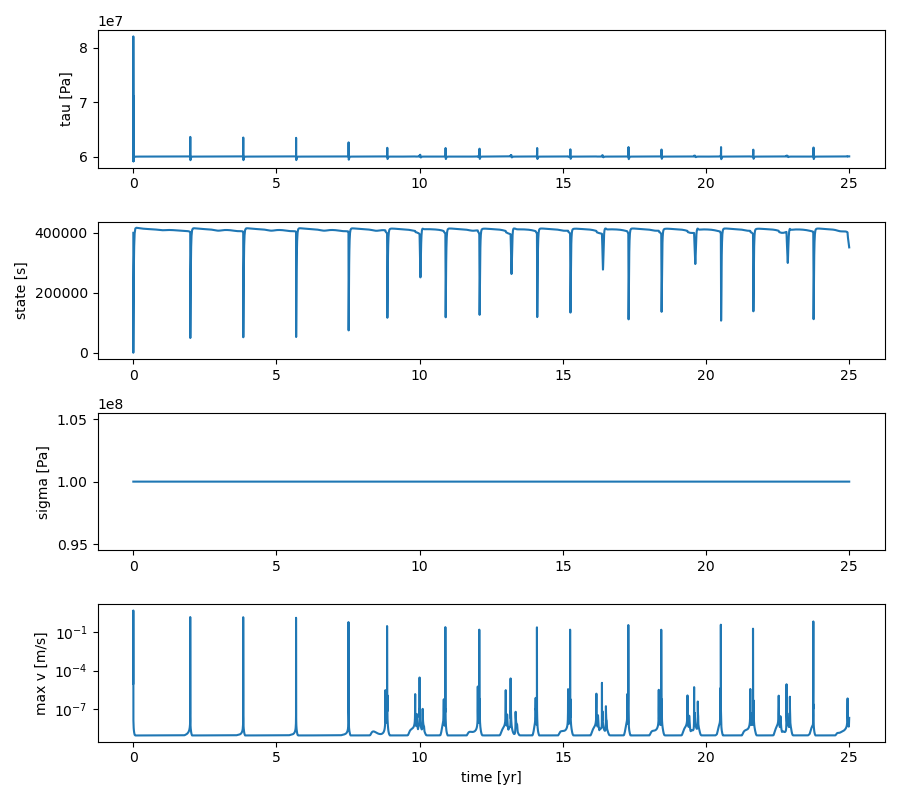

In [7]:
# Time series of stress, state, and maximum slip rate on the fault
qdyn_plot.timeseries(p.ot[0], p.ot_vmax)

In this double-asperity scenario, we see the opposite of what we saw in the single-asperity case: instead of converging to a stable limit cycle, the earthquake cycles diverge into (deterministic) chaos. This is clearly illustrated by the slip rate evolution:

42


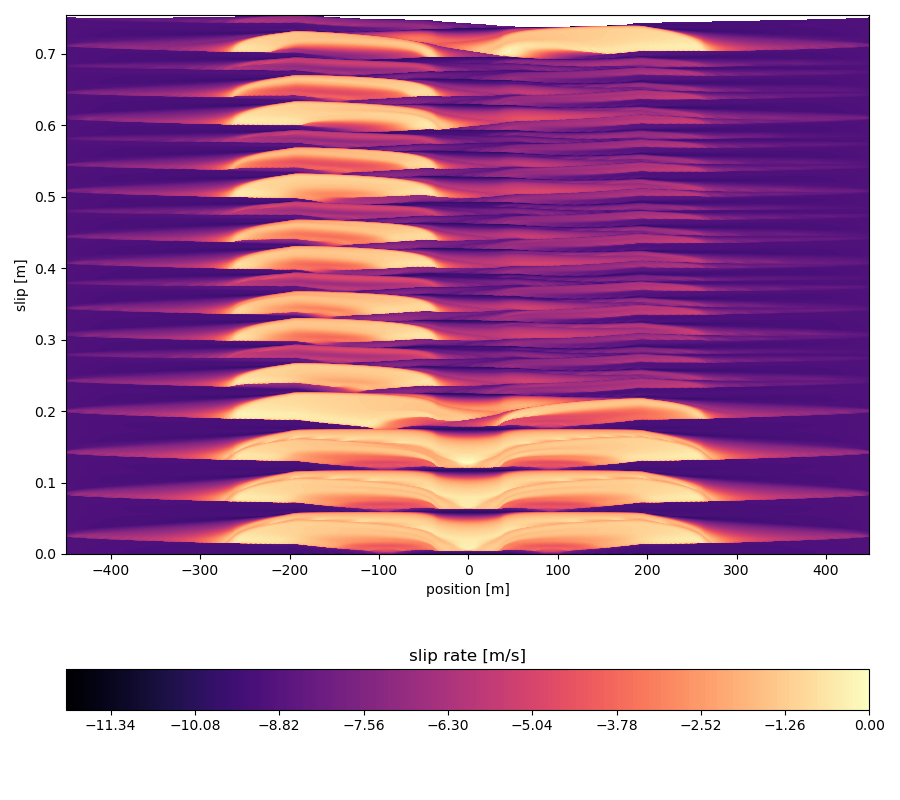

In [8]:
# Spatio-temporal evolution of slip rates
qdyn_plot.slip_profile(p.ox, warm_up=1*t_yr)

At first, both asperities rupture simultaneously, but after a few cycles, only the left asperity ruptures seismically while the right one mostly creeps. This pattern is reversed after a few more cycles. Another way of seeing this is with an animation:

In [9]:
# This will take a minute or two...
qdyn_plot.animation_slip(p.ox, warm_up=1*t_yr)

## Exercise

Vary `f` to see how the fault's response changes. Why does `f = 0.5` show chaotic behaviour, but not `f = 0.2`? Note that `f = 0.4` is the same as `f = 0.6` (it simply changes the order of the asperities).